In [12]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1323721


In [13]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [14]:
import ImageAnalysis3 as ia3

In [15]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [16]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 1000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907
-- 16 folders, 308 fovs detected.


In [11]:
_overwrite = False

_save_images = True

_warp_image = False
_fit_spots = True


#sel_fov_ids = np.concatenate([np.arange(81, 168), np.arange(18, 20)]) # batch1+2 in mendel
sel_fov_ids = np.arange(20,40)#np.arange(0,20)
# 0-9: processed not warpped.
# 10-19: warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    fov._save_to_file('merfish')
    fov._save_to_file('rna')
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 308
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304_

-- bleedthrough correction for channels: ['748', '637', '545'] in 11.595s
-- illumination correction for channels: 748, 637, -- drift 1: [ 0.2   3.63 -5.15] in 4.164s.
545, 477, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- drift 2: [ 0.21  3.71 -5.16] in 3.126s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 0.16  3.69 -5.16] in 10.334s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[ 0.16  3.69 -5.16] in 0.000s
 in 28.537s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 7.609s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 60.699s
in 10.370s
-- illumination correction for channels: 748, in 14.253s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.04  3.47 -4.62] in 2.415s.
63

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_020.dax  in 0.933s
-- removing hot pixels for channels:['477'] in 2.393s
-- illumination correction for channels: 477, in 1.224s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.837s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
++ base attributes saved:['rna_ref_im'] in 1.445s.
-- checking rna, region:[1] in 0.046s.
-- checking rna, region:[99 98 97] in 0.011s.
-- checking rna, region:[102 101 100] in 0.011s.
-- checking rna, region:[105 104 103] in 0.012s.
-- checking rna, region:[108 107 106] in 0.013s.
-- checking rna, region:[111 110 109] in 0.011s.
-- checking rna, region:[114 113 112] in 0.011s.
-- checking rna, region:[117 116 115] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing rna ids: [  1  9

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[108, 107, 106] in 0.045s
1000 fitted in 275.227s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[102, 101, 100] in 0.051s
1000 fitted in 263.407s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[111, 110, 109] in 0.050s
1000 fitted in 248.621s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[114, 113, 112] in 0.074s
1000 fitted in 210.722s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[105, 104, 103] in 0.039s


-- start aligning given source image to given reference image.
 in 36.875s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [-0.49  3.07 -6.43] in 2.179s.
in 8.934s
-- illumination correction for channels: 748, in 10.755s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-0.76  2.93 -6.56] in 2.099s.
637, -- drift 2: [-0.15  2.65 -6.59] in 2.086s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.47  2.88 -6.53] in 6.416s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.47  2.88 -6.53] in 0.000s
545, -- finish correction in 45.570s
477, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
 in 43.747s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.783s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given r

-- start aligning given source image to given reference image.
in 10.394s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [0. 0. 0.] in 1.847s.
-- drift 1: [0. 0. 0.] in 1.843s.
-- drift 2: [0. 0. 0.] in 1.930s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.696s
-- generate translation function for chromatic correction for channels: ['545'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 30.963s
 in 14.749s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 8.792s
-- illumination correction for channels: 748, 637, 545, 477,  in 23.185s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.387s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.148s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.2   6.17 -7.72] in 2.060s.
-- drift 1: [-0.74  6.22 -8.01] in 2.133s.
-- drift 2: [-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 12.910s
-- removing hot pixels for channels:['405'] in 2.490s
-- illumination correction for channels: 405, in 1.244s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.930s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
++ base attributes saved:['dapi_im'] in 1.367s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_022.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_022.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

-- finish correction in 33.057s
637, 545, 477, in 5.539s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.18  1.52 -6.05] in 2.084s.
in 10.776s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-0.07  1.53 -6.1 ] in 2.073s.
-- drift 2: [-0.1   1.56 -6.06] in 1.959s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.12  1.54 -6.07] in 6.187s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.12  1.54 -6.07] in 0.000s
-- finish correction in 42.415s
 in 33.152s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 8.739s
-- illumination correction for channels: 748, 637, 545, 477, in 5.293s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.17  2.89 -7.23] in 2.019s.
in 10.605s
-- bleedthrough correction for cha

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 305.929s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1, 2, 3] in 0.088s
1000 fitted in 310.070s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[4, 5, 6] in 0.049s
1000 fitted in 311.173s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[7, 8, 9] in 0.055s
1000 fitted in 294.104s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[16, 17, 18] in 0.055s
1000 fitted in 312.550s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1

-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 224.099s.
-- start fitting spots in channel:637, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 653 fitted in 257.730s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1] in 0.709s
1000 seeded with th=1000.0, 18 seeded with th=1000.0, 18 fitted in 221.407s.
-- start fitting spots in channel:637, 1000 fitted in 317.608s.
-- start fitting spots in channel:637, 1000 fitted in 309.776s.
-- start fitting spots in channel:637, 1000 fitted in 318.139s.
-- start fitting spots in channel:637, 1000 fitted in 369.555s.
-- start fitting spots in channel:637, 12 seeded with th=1000.0, 12 fitted in 197.475s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 13 seeded with th=1000.0, 13 fitted in 187.659s.
-- start fitting spots in channel:545, 1000 fitted in 285.745s

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_023.dax  in 16.630s
-- removing hot pixels for channels:['405'] in 2.391s
-- illumination correction for channels: 405, in 1.217s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 20.514s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
++ base attributes saved:['dapi_im'] in 1.444s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_023.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_023.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

-- start fitting spots in channel:545, 42 seeded with th=1000.0, 40 seeded with th=1000.0, 15 seeded with th=1000.0, 42 fitted in 216.491s.
-- start fitting spots in channel:545, 15 fitted in 204.159s.
-- start fitting spots in channel:545, 40 fitted in 212.038s.
-- start fitting spots in channel:545, 33 seeded with th=1000.0, 33 fitted in 206.206s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 294.883s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[1, 2, 3] in 0.103s
1000 fitted in 302.840s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[4, 5, 6] in 0.062s
1000 fi

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 293.921s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[13, 14, 15] in 0.053s
1000 fitted in 276.758s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[19, 20, 21] in 0.075s
1000 fitted in 300.705s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[10, 11, 12] in 0.042s
, finish in 881.61s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.230s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zsca

-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 24 seeded with th=1000.0, 24 fitted in 186.167s.
-- start fitting spots in channel:545, 313 seeded with th=1000.0, 1000 fitted in 283.342s.
-- start fitting spots in channel:545, 126 seeded with th=1000.0, 313 fitted in 210.772s.
-- start fitting spots in channel:545, 199 seeded with th=1000.0, 126 fitted in 192.558s.
-- start fitting spots in channel:545, 199 fitted in 200.404s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 186.825s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 307.728s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[99, 98, 97] in 0.139s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 308.986s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[117, 116, 115] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 284.027s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[102, 101, 100] in 0.052s
1000 fitted in 267.922s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[111, 110, 109] in 0.062s
1000 fitted in 274.991s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[108, 107, 106] in 0.050s
1000 fitted in 252.753s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[114, 113, 112] in 0.038s
1000 fitted in 236.598s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.15  3.19 -4.97] in 2.238s.
-- drift 1: [ 0.01  3.06 -5.1 ] in 1.985s.
-- drift 2: [-0.07  3.09 -5.01] in 1.940s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  3.11 -5.03] in 6.210s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.07  3.11 -5.03] in 0.000s
-- finish correction in 46.377s
in 10.204s
-- bleedthrough correction for channels: ['748', '637', '545']  in 45.548s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.126s
-- illumination correction for channels: 748, 637, 545, 477, in 5.442s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.735s
-- illumination correction for channels: 748, 637, -- drift 0: [-0.12  4.01 -5.91] in 2.061s.
545, in 11.795s
-- bleedthrough correction for channels: ['748', '637', '545']  in 57.15

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


27 fitted in 211.977s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


49 seeded with th=1000.0, 97 fitted in 234.744s.
-- start fitting spots in channel:545, 63 seeded with th=1000.0, 37 seeded with th=1000.0, 49 fitted in 219.333s.
-- start fitting spots in channel:545, 63 fitted in 220.525s.
-- start fitting spots in channel:545, 37 fitted in 214.459s.
-- start fitting spots in channel:545, 427 fitted in 269.855s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[52, 53] in 0.544s
31 seeded with th=1000.0, 31 fitted in 207.976s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 300.298s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[1, 2,

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.02  7.92 -4.85] in 0.000s
-- finish correction in 116.212s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- drift 2: [-0.04  7.62 -3.22] in 11.582s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.02  7.66 -3.23] in 26.578s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.02  7.66 -3.23] in 0.001s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.494s
-- start fitting spots in channel:748, -- finish correction in 127.196s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.408s
-- start fitting spots in channel:748, 686 seeded with th=1000

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 373.618s.
-- start fitting spots in channel:637, 26 seeded with th=1000.0, 26 fitted in 200.232s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 22 seeded with th=1000.0, 22 fitted in 189.882s.
-- start fitting spots in channel:545, 409 seeded with th=1000.0, 1000 fitted in 292.023s.
-- start fitting spots in channel:545, 109 seeded with th=1000.0, 319 seeded with th=1000.0, 409 fitted in 221.658s.
-- start fitting spots in channel:545, 109 fitted in 195.425s.
-- start fitting spots in channel:545, 24 seeded with th=1000.0, 24 fitted in 189.769s.
-- start fitting spots in channel:545, 319 fitted in 217.455s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 316.381s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[99, 98, 97] in 0.183s
1000 seeded with th=1000

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 312.428s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[117, 116, 115] in 0.056s
1000 fitted in 280.065s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[102, 101, 100] in 0.052s
1000 fitted in 271.411s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[108, 107, 106] in 0.050s
1000 fitted in 274.600s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[111, 110, 109] in 0.046s
1000 fitted in 246.500s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k090

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 0.934s
-- removing hot pixels for channels:['477'] in 2.364s
-- illumination correction for channels: 477, in 1.224s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.800s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.342s.
-- checking merfish, region:[52 53] in 0.044s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

1000 fitted in 281.865s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[10, 11, 12] in 0.048s
1000 fitted in 273.353s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[16, 17, 18] in 0.054s
1000 fitted in 282.220s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
1000 fitted in 286.608s.
-- updated spots for id:[13, 14, 15] in 0.031s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[4, 5, 6] in 0.053s
1000 fitted in 261.987s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[1] in 0.592s
1000 fitted in 318.633s.
-- start fitting spots in channel:637, 1000 fitted in 320.039s.
-- start fitting spots in channel:637, 12 seeded with th=1000.0, 12 fitted in 201.827s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 fitted in 440.814s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 191.275s.
-- start fitting spots in channel:545, 316 seeded with th=1000.0, 316 fitted in 214.654s.
-- start fitting spots in channel:545, 1000 fitted in 290.319s.
-- start fitting spots in channel:545, 109 seeded with th=1000.0, 201 seeded with th=1000.0, 109 fitted in 191.411s.
-- start fitting spots in channel:545, 201 fitted in 200.755s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 7 seeded with th=1000.0, 7 fitted in 181.962s.
-- start fitting spots in c

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 230.339s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
1000 fitted in 176.861s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[105, 104, 103] in 0.027s
, finish in 899.69s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.247s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 308
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_026.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_026.hdf5 in 0.425s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_026.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_026.dax  in 1.242s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H1M2/Conv_zscan_

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 seeded with th=1000.0, 85 fitted in 230.938s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 8 fitted in 206.024s.
-- start fitting spots in channel:545, 18 fitted in 208.438s.
-- start fitting spots in channel:545, 38 seeded with th=1000.0, 38 fitted in 207.420s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 202.642s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 198.915s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 283.532s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[1, 2, 3] in 0.049s
1000 seeded with th=1000.0, 1000 fitted in 286.745s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- drift 2: [-0.04  7.88 -4.72] in 10.454s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.04  7.88 -4.72] in 26.480s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  7.88 -4.72] in 0.000s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.069s
-- start fitting spots in channel:748, -- finish correction in 75.770s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.634s
-- start fitting spots in channel:748, 1000 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 193.402s.
-- start fitting spots in channel:637, 1000 seeded with th=1000.0, 8 seeded with th=1000.0, 389 seeded with th=100

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 284.354s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[117, 116, 115] in 0.056s
1000 fitted in 272.113s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[108, 107, 106] in 0.052s
1000 fitted in 257.629s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[102, 101, 100] in 0.048s
1000 fitted in 264.211s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[111, 110, 109] in 0.045s
1000 fitted in 222.688s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_027.dax  in 0.990s
-- removing hot pixels for channels:['477'] in 2.424s
-- illumination correction for channels: 477, in 1.301s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.008s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.488s.
-- checking merfish, region:[52 53] in 0.050s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


74 seeded with th=1000.0, 58 fitted in 220.732s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


52 fitted in 223.606s.
-- start fitting spots in channel:545, 79 seeded with th=1000.0, 74 fitted in 217.240s.
-- start fitting spots in channel:545, 79 fitted in 216.437s.
-- start fitting spots in channel:545, 139 fitted in 248.173s.
-- start fitting spots in channel:545, 45 seeded with th=1000.0, 45 fitted in 212.308s.
-- start fitting spots in channel:545, 55 seeded with th=1000.0, 55 fitted in 214.036s.
-- start fitting spots in channel:545, 596 fitted in 305.216s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[52, 53] in 0.478s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 317.393s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_02

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 322.609s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[10, 11, 12] in 0.051s
1000 fitted in 301.595s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[16, 17, 18] in 0.042s
1000 fitted in 312.964s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
1000 fitted in 316.155s.-- updated spots for id:[4, 5, 6] in 0.040s

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[13, 14, 15] in 0.046s
999 fitted in 289.726s.- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5

-- updated spots for 

1000 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 202.529s.
-- start fitting spots in channel:637, 906 fitted in 303.484s.
-- start fitting spots in channel:637, 1000 fitted in 308.859s.
-- start fitting spots in channel:637, 1000 fitted in 307.234s.
-- start fitting spots in channel:637, 31 seeded with th=1000.0, 31 fitted in 195.653s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 fitted in 395.147s.
-- start fitting spots in channel:637, 48 seeded with th=1000.0, 48 fitted in 190.156s.
-- start fitting spots in channel:545, 1000 fitted in 285.099s.
-- start fitting spots in channel:545, 375 seeded with th=1000.0, 138 seeded with th=1000.0, 270 seeded with th=1000.0, 138 fitted in 196.173s.
-- start fitting spots in channel:545, 375 fitted in 219.440s.
-- start fitting spots in channel:545, 270 fitted in 208.352s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 38 seeded with th=1000.0, 38 fitted in 187.667s.
-- start fitting

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_028.dax  in 18.022s
-- removing hot pixels for channels:['405'] in 2.414s
-- illumination correction for channels: 405, in 1.216s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 21.926s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
++ base attributes saved:['dapi_im'] in 1.415s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_028.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_028.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[52, 53] in 0.502s
34 seeded with th=1000.0, 34 fitted in 212.163s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 308.285s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[1, 2, 3] in 0.055s
1000 fitted in 314.015s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[4, 5, 6] in 0.055s
1000 fitted in 314.205s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Ana

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.44  7.52 -3.02] in 0.001s
-- finish correction in 91.717s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.531s
-- start fitting spots in channel:748, 525 seeded with th=1000.0, 52 seeded with th=1000.0, 52 fitted in 193.249s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 217.443s.
-- start fitting spots in channel:637, 949 seeded with th=1000.0, 525 fitted in 238.095s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[1] in 0.525s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 9 seeded with th=1000.0, 9 fitted in 201.603s.
-- start fitting spots in channel:637,

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.469s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- merfish attributes updated:[] in 0.009s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1em

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 8.865s
-- start fitting spots in channel:748, 201 seeded with th=1000.0, 201 fitted in 177.762s.
-- start fitting spots in channel:637, 257 seeded with th=1000.0, 73 seeded with th=1000.0, 24 seeded with th=1000.0, 73 fitted in 214.425s.
-- start fitting spots in channel:637, 33 seeded with th=1000.0, 24 fitted in 212.803s.
-- start fitting spots in channel:637, 257 fitted in 226.331s.
-- start fitting spots in channel:637, 77 seeded with th=1000.0, 33 fitted in 211.822s.
-- start fitting spots in channel:637, 77 fitted in 214.377s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 209.189s.
-- start fitting spots in channel:637, 94 seeded with th=1000.0, 94 fitted in 221.137s.
-- start fitting spots in channel:637, 501 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


140 seeded with th=1000.0, 65 seeded with th=1000.0, 33 seeded with th=1000.0, 81 seeded with th=1000.0, 501 fitted in 281.424s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[52, 53] in 0.561s
33 fitted in 221.961s.
-- start fitting spots in channel:545, 65 fitted in 222.419s.
-- start fitting spots in channel:545, 94 seeded with th=1000.0, 81 fitted in 223.201s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


14 fitted in 209.085s.
-- start fitting spots in channel:545, 94 fitted in 220.176s.
-- start fitting spots in channel:545, 139 fitted in 246.853s.
-- start fitting spots in channel:545, 43 seeded with th=1000.0, 43 fitted in 206.086s.
-- start fitting spots in channel:545, 837 seeded with th=1000.0, 827 seeded with th=1000.0, 820 seeded with th=1000.0, 952 seeded with th=1000.0, 760 seeded with th=1000.0, 809 seeded with th=1000.0, 962 seeded with th=1000.0, 827 fitted in 284.883s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[1, 2, 3] in 0.049s
760 fitted in 275.049s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[16, 17, 18] in 0.045s
809 fitted in 284.024s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


837 fitted in 307.741s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[7, 8, 9] in 0.085s
820 fitted in 302.590s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[10, 11, 12] in 0.041s
952 fitted in 305.321s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[13, 14, 15] in 0.033s
962 fitted in 281.249s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[19, 20, 21] in 0.032s
, finish in 870.78s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- merfish attributes updated:['ef_

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 311.607s.
-- start fitting spots in channel:637, 1000 fitted in 299.347s.
-- start fitting spots in channel:637, 1000 fitted in 305.946s.
-- start fitting spots in channel:637, 1000 fitted in 346.167s.
-- start fitting spots in channel:637, 25 seeded with th=1000.0, 25 fitted in 194.442s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 19 seeded with th=1000.0, 19 fitted in 189.944s.
-- start fitting spots in channel:545, 1000 fitted in 284.867s.
-- start fitting spots in channel:545, 332 seeded with th=1000.0, 131 seeded with th=1000.0, 190 seeded with th=1000.0, 131 fitted in 200.556s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 20 fitted in 189.441s.
-- start fitting spots in channel:545, 332 fitted in 221.542s.
-- start fitting spots in channel:545, 190 fitted in 203.520s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 935 seeded with th=1000.0, 928 seeded with th=1000.0, 1000 fit

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 13.840s
-- removing hot pixels for channels:['405'] in 2.427s
-- illumination correction for channels: 405, in 1.226s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 17.768s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
++ base attributes saved:['dapi_im'] in 1.474s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_030.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_030.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


10 fitted in 208.314s.
-- start fitting spots in channel:637, 18 seeded with th=1000.0, 63 fitted in 219.008s.
-- start fitting spots in channel:637, 208 fitted in 227.276s.
-- start fitting spots in channel:637, 18 fitted in 210.067s.
-- start fitting spots in channel:637, 60 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 211.794s.
-- start fitting spots in channel:637, 60 fitted in 220.400s.
-- start fitting spots in channel:637, 69 seeded with th=1000.0, 69 fitted in 217.168s.
-- start fitting spots in channel:637, 450 seeded with th=1000.0, 18 seeded with th=1000.0, 18 fitted in 210.703s.
-- start fitting spots in channel:545, 67 seeded with th=1000.0, 120 seeded with th=1000.0, 45 seeded with th=1000.0, 45 fitted in 221.084s.
-- start fitting spots in channel:545, 67 fitted in 219.120s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 seeded with th=1000.0, 60 seeded with th=1000.0, 8 fitted in 208.145s.
-- start fitting spots in channel:545, 60 fitted in 215.062s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


41 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


41 fitted in 212.055s.
-- start fitting spots in channel:545, 450 fitted in 283.399s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
120 fitted in 267.477s.
-- start fitting spots in channel:545, -- updated spots for id:[52, 53] in 0.572s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 952 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 952 fitted in 302.601s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[16, 17, 18] in 0.059s
1000 fitted in 312.937s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[1, 2, 3] in 0.051s
1000 fitted in 331.752s.
- writting merfish spots into file:/lab/weissm

-- finish correction in 99.508s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.854s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.574s
-- start fitting spots in channel:748, 485 seeded with th=1000.0, 20 seeded with th=1000.0, 20 fitted in 205.758s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 918 seeded with th=1000.0, 5 fitted in 220.111s.
-- start fitting spots in channel:637, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 485 fitted in 247.398s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[1] in 0.485s
1000 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 207.617s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


918 fitted in 308.124s.
-- start fitting spots in channel:637, 1000 fitted in 302.667s.
-- start fitting spots in channel:637, 1000 fitted in 309.382s.
-- start fitting spots in channel:637, 1000 fitted in 358.649s.
-- start fitting spots in channel:637, 18 seeded with th=1000.0, 18 fitted in 193.330s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 22 seeded with th=1000.0, 22 fitted in 185.639s.
-- start fitting spots in channel:545, 373 seeded with th=1000.0, 1000 fitted in 283.552s.
-- start fitting spots in channel:545, 130 seeded with th=1000.0, 130 fitted in 191.670s.
-- start fitting spots in channel:545, 185 seeded with th=1000.0, 17 seeded with th=1000.0, 373 fitted in 220.240s.
-- start fitting spots in channel:545, 17 fitted in 181.972s.
-- start fitting spots in channel:545, 185 fitted in 199.124s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 303.475s.
- writting

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 261.863s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[114, 113, 112] in 0.056s
1000 fitted in 286.349s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[111, 110, 109] in 0.047s
1000 fitted in 271.303s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[108, 107, 106] in 0.037s
1000 fitted in 269.367s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[105, 104, 103] in 0.030s
, finish in 906.20s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
--- rna attributes updated:['ef_id', 

++ base attributes saved:['merfish_ref_im'] in 1.384s.
-- checking merfish, region:[52 53] in 0.050s.
-- checking merfish, region:[1 2 3] in 0.015s.
-- checking merfish, region:[4 5 6] in 0.014s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.012s.
-- checking merfish, region:[13 14 15] in 0.012s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.011s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_031.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_031.hdf5 in 0.419s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_0

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[13, 14, 15] in 0.039s
1000 fitted in 263.889s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[16, 17, 18] in 0.030s
1000 fitted in 254.746s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[19, 20, 21] in 0.026s
, finish in 842.33s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.247s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_031.dax
- correct the w

-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 187.238s.
-- start fitting spots in channel:545, 254 seeded with th=1000.0, 254 fitted in 208.998s.
-- start fitting spots in channel:545, 78 seeded with th=1000.0, 1000 fitted in 295.989s.
-- start fitting spots in channel:545, 78 fitted in 193.206s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 111 seeded with th=1000.0, 111 fitted in 197.649s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 184.934s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 308.401s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[99, 98, 97] in 0.052s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 286.271s.
- writting rna spots into file:/lab/weissman_imaging/puzhe

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_032.dax  in 14.734s
-- removing hot pixels for channels:['405'] in 2.445s
-- illumination correction for channels: 405, in 1.214s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 18.667s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
++ base attributes saved:['dapi_im'] in 1.429s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_032.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_032.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

-- start fitting spots in channel:545, 47 fitted in 212.674s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 20 fitted in 211.564s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 207.283s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 300.572s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[1, 2, 3] in 0.051s
1000 fitted in 306.573s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[4, 5, 6] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 316.748s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[7, 8, 9] in 0.051s
1000 fitted in 293.489s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[16, 17, 18] in 0.043s
1000 fitted in 308.391s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[10, 11, 12] in 0.049s
1000 fitted in 306.635s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[13, 14, 15] in 0.031s
1000 fitted in 283.478s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[1] in 0.525s
649 fitted in 282.026s.
-- start fitting spots in channel:637, 1000 fitted in 311.415s.
-- start fitting spots in channel:637, 1000 fitted in 314.573s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 198.852s.
-- start fitting spots in channel:545, 1000 fitted in 390.097s.
-- start fitting spots in channel:637, 1000 seeded with th=1000.0, 24 seeded with th=1000.0, 24 fitted in 188.068s.
-- start fitting spots in channel:545, 258 seeded with th=1000.0, 258 fitted in 209.474s.
-- start fitting spots in channel:545, 1000 fitted in 289.442s.
-- start fitting spots in channel:545, 121 seeded with th=1000.0, 121 fitted in 194.922s.
-- start fitting spots in channel:545, 187 seeded with th=1000.0, 187 fitted in 201.530s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 1000 seeded w

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax  in 12.294s
-- removing hot pixels for channels:['405'] in 2.469s
-- illumination correction for channels: 405, in 1.228s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.274s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
++ base attributes saved:['dapi_im'] in 1.373s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


33 fitted in 217.777s.
-- start fitting spots in channel:545, 61 fitted in 214.634s.
-- start fitting spots in channel:545, 61 fitted in 225.814s.
-- start fitting spots in channel:545, 25 seeded with th=1000.0, 25 fitted in 205.317s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 296.193s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[1, 2, 3] in 0.157s
1000 fitted in 294.209s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[4, 5, 6] in 0.050s
1000 fitted in 300.088s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 286.847s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[10, 11, 12] in 0.025s
, finish in 852.37s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.251s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_033.dax  in 0.904s
-- removing hot pixels for channels:['4

-- start fitting spots in channel:545, 108 seeded with th=1000.0, 144 seeded with th=1000.0, 108 fitted in 195.906s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


144 fitted in 203.835s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 187.682s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 312.493s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[99, 98, 97] in 0.049s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 295.619s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[117, 116, 115] in 0.051s
1000 seeded with th=1000.0, 1000 fitted in 280.110s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[108, 107, 106] in 0.060s
1000 fitted in 273.874s.
- writting rna spots into file:/lab/weissman

++ base attributes saved:['dapi_im'] in 1.329s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_034.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_034.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_034.dax  in 0.921s
-- removing hot pixels for channels:['477'] in 2.360s
-- illumination correction for channels: 477, in 1.214s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.772s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.316s.
-- checking me

-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 307.747s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[1, 2, 3] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 314.143s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[4, 5, 6] in 0.058s
1000 fitted in 316.363s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
1000 fitted in 327.741s.
-- updated spots for id:[10, 11, 12] in 0.039s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[7, 8, 9] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 315.609s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[13, 14, 15] in 0.044s
1000 fitted in 303.893s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[16, 17, 18] in 0.030s
1000 fitted in 300.231s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[19, 20, 21] in 0.044s
, finish in 864.12s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.223s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zsca

-- start fitting spots in channel:545, 1000 fitted in 404.256s.
-- start fitting spots in channel:637, 1000 seeded with th=1000.0, 13 seeded with th=1000.0, 13 fitted in 187.018s.
-- start fitting spots in channel:545, 208 seeded with th=1000.0, 208 fitted in 203.976s.
-- start fitting spots in channel:545, 1000 fitted in 290.788s.
-- start fitting spots in channel:545, 95 seeded with th=1000.0, 95 fitted in 191.092s.
-- start fitting spots in channel:545, 175 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


175 fitted in 206.374s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 20 seeded with th=1000.0, 20 fitted in 182.862s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 336.725s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[99, 98, 97] in 0.059s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 334.505s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[117, 116, 115] in 0.043s
1000 fitted in 311.720s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[108, 107, 106] in 0.054s
1000 fitted in 291.223s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[102, 101, 100] in 0.058s
1000 fitted in 287.841s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[111, 110, 109] in 0.048s
1000 fitted in 252.770s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_035.dax  in 0.866s
-- removing hot pixels for channels:['477'] in 2.352s
-- illumination correction for channels: 477, in 1.221s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 4.715s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.350s.
-- checking merfish, region:[52 53] in 0.043s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.013s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing mer

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 292.126s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[1, 2, 3] in 0.143s
1000 fitted in 286.808s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[4, 5, 6] in 0.054s
1000 fitted in 309.081s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[7, 8, 9] in 0.050s
1000 fitted in 291.211s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[10, 11, 12] in 0.042s
1000 fitted in 272.357s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 284.618s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[13, 14, 15] in 0.030s
1000 fitted in 280.136s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[16, 17, 18] in 0.026s
, finish in 823.25s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.237s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_035.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_035.dax
-- loading illumination correction profile from file:
	 477 illumin

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 321.599s.
-- start fitting spots in channel:637, 20 seeded with th=1000.0, 20 fitted in 197.976s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 fitted in 431.005s.
-- start fitting spots in channel:637, 12 seeded with th=1000.0, 12 fitted in 188.317s.
-- start fitting spots in channel:545, 260 seeded with th=1000.0, 260 fitted in 213.055s.
-- start fitting spots in channel:545, 1000 fitted in 291.144s.
-- start fitting spots in channel:545, 74 seeded with th=1000.0, 74 fitted in 190.597s.
-- start fitting spots in channel:545, 116 seeded with th=1000.0, 1000 seeded with th=1000.0, 116 fitted in 196.693s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 183.848s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 309.824s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- update

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 310.688s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[117, 116, 115] in 0.049s
1000 seeded with th=1000.0, 1000 fitted in 266.211s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[102, 101, 100] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 261.273s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[111, 110, 109] in 0.044s
1000 fitted in 310.494s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[108, 107, 106] in 0.045s
1000 fitted in 248.267s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[114, 113, 112] in 0.036s
1000 fitted in 203.169s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[105, 104, 103] in 0.028s
, finish in 900.78s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
--- rna attributes updated:['ef_id', 

++ base attributes saved:['merfish_ref_im'] in 1.463s.
-- checking merfish, region:[52 53] in 0.045s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_036.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_036.hdf5 in 0.459s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_0

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[16, 17, 18] in 0.043s
1000 fitted in 283.388s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
1000 fitted in 291.111s.
-- updated spots for id:[19, 20, 21] in 0.029s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[13, 14, 15] in 0.029s
, finish in 842.14s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.273s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_036.dax
- correct the w

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


25 seeded with th=1000.0, 1000 fitted in 316.914s.
-- start fitting spots in channel:637, 25 fitted in 198.093s.
-- start fitting spots in channel:545, 1000 fitted in 321.847s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 fitted in 470.772s.
-- start fitting spots in channel:637, 235 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 289.326s.
-- start fitting spots in channel:545, 235 fitted in 213.083s.
-- start fitting spots in channel:545, 82 seeded with th=1000.0, 1000 seeded with th=1000.0, 82 fitted in 195.807s.
-- start fitting spots in channel:545, 203 seeded with th=1000.0, 203 fitted in 206.723s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 13 fitted in 186.271s.
-- start fitting spots in channel:545, 1000 fitted in 324.453s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[99, 98, 97] in 0.041s
1000 fitted in 412.215s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 287.534s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[102, 101, 100] in 0.053s
1000 fitted in 300.743s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[108, 107, 106] in 0.044s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 279.034s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[111, 110, 109] in 0.047s
1000 seeded with th=1000.0, 1000 fitted in 258.419s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[114, 113, 112] in 0.050s
1000 fitted in 194.866s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[105, 104, 103] in 0.033s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


992 fitted in 241.909s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[117, 116, 115] in 0.030s
, finish in 1004.81s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.256s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 308
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_037.hdf5 in 0.426s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 1.324s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H1M2/Conv_zscan_037.dax for channels:['748', '637', '545']
- loading merfish info from f

-- updated spots for id:[13, 14, 15] in 0.027s
, finish in 811.23s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.265s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 0.894s
-- removing hot pixels for channels:['477'] in 2.376s
-- illumination correction for channels: 477, in 1.222s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 175 seeded with th=1000.0, 175 fitted in 206.308s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 40 seeded with th=1000.0, 40 fitted in 188.737s.
-- start fitting spots in channel:545, 1000 fitted in 501.193s.
-- start fitting spots in channel:637, 1000 fitted in 297.461s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 107 seeded with th=1000.0, 107 fitted in 198.646s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 fitted in 374.586s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 184.180s.
-- start fitting spots in channel:545, 1000 fitted in 326.410s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[99, 98, 97] in 0.049s
1000 seeded with th=1000.0, 1000 fitted in 282.852s.
- writting rna spots into file:/lab/weissman_imaging/puzhen

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 149.874s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[105, 104, 103] in 0.031s
1000 fitted in 211.015s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[117, 116, 115] in 0.030s
, finish in 940.08s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.253s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 308
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_038.hdf5 in 0.462s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax  in 1.363s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H1M2/Conv_zscan_

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[16, 17, 18] in 0.029s
, finish in 811.20s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.222s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_038.dax  in 0.899s
-- removing hot pixels for channels:['477'] in 2.430s
-- illumin

-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 184.368s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 319.274s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[99, 98, 97] in 0.049s
1000 seeded with th=1000.0, 1000 fitted in 285.817s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[117, 116, 115] in 0.052s
1000 fitted in 286.911s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[108, 107, 106] in 0.045s
1000 fitted in 252.982s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/2

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 224.246s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[114, 113, 112] in 0.039s
1000 fitted in 144.187s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[105, 104, 103] in 0.028s
, finish in 886.07s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.281s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 308
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed 

+ Start multi-processing of pre-processing for 8 images with 32 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_039.hdf5 in 0.423s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H1M2/Conv_zscan_039.dax for channels:['748', '637', '545']
- loading merfish info from file:

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[19, 20, 21] in 0.030s
, finish in 806.11s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.244s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/H0M1/Conv_zscan_039.dax  in 0.902s
-- removing hot pixels for channels:['477'] in 2.434s
-- illumin

-- start fitting spots in channel:545, 14 seeded with th=1000.0, 1000 seeded with th=1000.0, 14 fitted in 187.852s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 309.419s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[99, 98, 97] in 0.049s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 290.476s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[117, 116, 115] in 0.060s
1000 seeded with th=1000.0, 1000 fitted in 264.814s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[102, 101, 100] in 0.049s
1000 fitted in 266.406s.
- writting rna spots into file:/lab/weis

In [8]:
fov._save_to_file('merfish')

-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230915-4T1emx1_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags', 'ef_id', 'ef_im'] in 0.377s.


## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
for _hyb_fd, _info in color_usage_df.iterrows():
    print(_info, type(_info), _info==np.nan)

748       r2
637      m53
545    empty
477    beads
405     DAPI
Name: H0M1, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H0M1, dtype: bool
748       m1
637       m2
545       m3
477    beads
405      NaN
Name: H1M2, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H1M2, dtype: bool
748       m4
637       m5
545       m6
477    beads
405      NaN
Name: H2M3, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H2M3, dtype: bool
748       m7
637       m8
545       m9
477    beads
405      NaN
Name: H3M4, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H3M4, dtype: bool
748      m10
637      m11
545      m12
477    beads
405      NaN
Name: H4M5, dtype: object <class 'pandas.core.series.Series'> 748    Fa

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


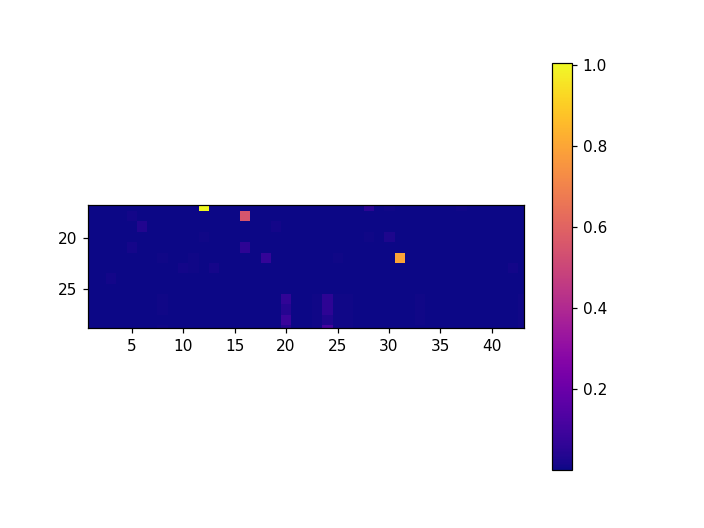

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


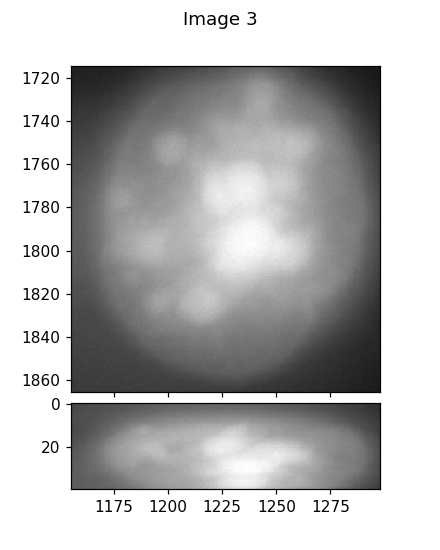

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new